## Set up file to run 

In [1]:
import pandas as pd
import sys
import os
import yaml
config_path = os.path.join("..", "config.yaml")
with open(config_path, 'r') as file:
    config = yaml.safe_load(file)
sys.path.append(os.path.abspath(".."))
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Importing requirements

In [2]:
from src.load_data import DataLoaderFactory
from src.handelling_missing_values import Impute
from analyse_src.missing_val_analysis import MissingValueAnalysisFactory
from src.preprocessing import PreprocessingFactory
from src.data_splitter import DataSpliter,SimpleTrainTestSplit
from src.model_building import ModelFactory
from src.model_evaluation import ModelEvaluationFactory
from analyse_src.conf import ConfusionAndReportVisualizer

In [3]:
k2_df=DataLoaderFactory().get_loader(".csv").load(r"C:\Users\rk186\OneDrive\Desktop\NASA_challenge_2025\data\k2pandc_2025.09.17_04.48.32.csv")

2025-10-03 23:24:00,801 -INFO - Loading data from C:\Users\rk186\OneDrive\Desktop\NASA_challenge_2025\data\k2pandc_2025.09.17_04.48.32.csv


In [4]:
k2_df.head(4)

,pl_name,hostname,default_flag,disposition,disp_refname,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,soltype,pl_controv_flag,pl_refname,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,pl_orbsmaxerr1,pl_orbsmaxerr2,pl_orbsmaxlim,pl_rade,pl_radeerr1,pl_radeerr2,pl_radelim,pl_radj,pl_radjerr1,pl_radjerr2,pl_radjlim,pl_bmasse,pl_bmasseerr1,pl_bmasseerr2,pl_bmasselim,pl_bmassj,pl_bmassjerr1,pl_bmassjerr2,pl_bmassjlim,pl_bmassprov,pl_orbeccen,pl_orbeccenerr1,pl_orbeccenerr2,pl_orbeccenlim,pl_insol,pl_insolerr1,pl_insolerr2,pl_insollim,pl_eqt,pl_eqterr1,pl_eqterr2,pl_eqtlim,ttv_flag,st_refname,st_spectype,st_teff,st_tefferr1,st_tefferr2,st_tefflim,st_rad,st_raderr1,st_raderr2,st_radlim,st_mass,st_masserr1,st_masserr2,st_masslim,st_met,st_meterr1,st_meterr2,st_metlim,st_metratio,st_logg,st_loggerr1,st_loggerr2,st_logglim,sy_refname,rastr,ra,decstr,dec,sy_dist,sy_disterr1,sy_disterr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,rowupdate,pl_pubdate,releasedate
0,BD+20 594 b,BD+20 594,0,CONFIRMED,Espinoza et al. 2016,1.0,1.0,Transit,2016.0,K2,Published Confirmed,0.0,<a refstr=MAYO_ET_AL__2018 href=https://ui.ads...,41.688644,0.003353,-0.003419,0.0,NaN,NaN,NaN,NaN,2.355454,0.31000,-0.166773,0.0,0.210139,0.027656,-0.014878,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,<a refstr=MAYO_ET_AL__2018 href=https://ui.ads...,NaN,5703.00,50.00,-50.00,0.0,0.956122,0.098585,-0.054675,0.0,0.963861,0.029568,-0.032166,0.0,-0.06,0.080,-0.080,0.0,[Fe/H],4.38000,0.100000,-0.100000,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,03h34m36.27s,53.651123,+20d35m56.47s,20.599021,179.4610,1.2570,-1.2400,10.849,0.012,-0.012,9.368,0.018,-0.018,10.8644,0.000249,-0.000249,2018-04-25,2018-03,2018-02-15
1,BD+20 594 b,BD+20 594,0,CONFIRMED,Espinoza et al. 2016,1.0,1.0,Transit,2016.0,K2,Published Confirmed,0.0,<a refstr=ESPINOZA_ET_AL__2016 href=https://ui...,41.685500,0.003000,-0.003100,0.0,0.241,0.019,-0.017,0.0,2.230000,0.14000,-0.110000,0.0,0.198947,0.012490,-0.009814,0.0,16.3000,6.0000,-6.1000,0.0,0.051285,0.018878,-0.019193,0.0,Mass,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,546.0,19.0,-18.0,0.0,0.0,<a refstr=ESPINOZA_ET_AL__2016 href=https://ui...,G,5766.00,99.00,-99.00,0.0,0.928000,0.055000,-0.040000,0.0,0.961000,0.032000,-0.029000,0.0,-0.15,0.050,-0.050,0.0,[Fe/H],4.50000,0.080000,-0.080000,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,03h34m36.27s,53.651123,+20d35m56.47s,20.599021,179.4610,1.2570,-1.2400,10.849,0.012,-0.012,9.368,0.018,-0.018,10.8644,0.000249,-0.000249,2018-04-25,2016-10,2016-07-28
2,BD+20 594 b,BD+20 594,1,CONFIRMED,Espinoza et al. 2016,1.0,1.0,Transit,2016.0,K2,Published Confirmed,0.0,<a refstr=STASSUN_ET_AL__2017 href=https://ui....,41.685500,0.003000,-0.003000,0.0,NaN,NaN,NaN,NaN,2.578070,0.11209,-0.112090,0.0,0.230000,0.010000,-0.010000,0.0,22.2481,9.5349,-9.5349,0.0,0.070000,0.030000,-0.030000,0.0,Mass,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,<a refstr=STASSUN_ET_AL__2017 href=https://ui....,NaN,5766.00,99.00,-99.00,0.0,1.080000,0.060000,-0.060000,0.0,1.670000,0.400000,-0.400000,0.0,-0.15,NaN,NaN,0.0,[Fe/H],4.50000,0.080000,-0.080000,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,03h34m36.27s,53.651123,+20d35m56.47s,20.599021,179.4610,1.2570,-1.2400,10.849,0.012,-0.012,9.368,0.018,-0.018,10.8644,0.000249,-0.000249,2018-04-25,2017-03,2018-04-26
3,EPIC 201111557.01,EPIC 201111557,1,CANDIDATE,Livingston et al. 2018,1.0,0.0,Transit,2018.0,K2,Published Candidate,0.0,<a refstr=LIVINGSTON_ET_AL__2018 href=https://...,2.301830,0.000280,-0.000300,0.0,NaN,NaN,NaN,NaN,1.120000,0.11000,-0.080000,0.0,0.099900,0.009800,-0.007000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1054.0,55.0,-55.0,0.0,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,NaN,4616.52,82.36,-115.56,0.0,0.762602,0.053651,-0.037585,0.0,0.730000,0.084105,-0.081044,0.0,-0.03,0.034,-0.034,0.0,[M/H],4.5367

In [5]:
k2_df.st_metratio.value_counts()

st_metratio
[Fe/H]    1321
[M/H]      279
[m/H]        3
Name: count, dtype: int64

In [6]:
print(f"The data contain {k2_df.shape[0]} rows and {k2_df.shape[1]} columns")

The data contain 3906 rows and 94 columns


In [7]:
print("Null value is present:",True if k2_df.isna().sum().sum()>0 else False)

Null value is present: True


## **Filling NAN value**

2025-10-03 23:24:01,080 -INFO - Missing Value Report:
         Column  Missing Values  Percentage
pl_orbeccenerr2            3683   94.290835
pl_orbeccenerr1            3683   94.290835
  pl_bmasseerr1            3589   91.884281
  pl_bmasseerr2            3589   91.884281
  pl_bmassjerr2            3589   91.884281
  pl_bmassjerr1            3589   91.884281
      pl_bmassj            3550   90.885817
   pl_bmasselim            3550   90.885817
      pl_bmasse            3550   90.885817
   pl_bmassjlim            3550   90.885817
   pl_bmassprov            3550   90.885817
   pl_insolerr1            3540   90.629800
   pl_insolerr2            3540   90.629800
    pl_orbeccen            3487   89.272913
 pl_orbeccenlim            3487   89.272913
    st_spectype            3476   88.991295
       pl_insol            3370   86.277522
    pl_insollim            3370   86.277522
     pl_eqterr1            3312   84.792627
     pl_eqterr2            3312   84.792627
         pl_eqt       

c:\Users\rk186\OneDrive\Desktop\NASA_challenge_2025\analyse_src\missing_val_analysis.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_data.index, y=missing_data.values, palette="viridis")


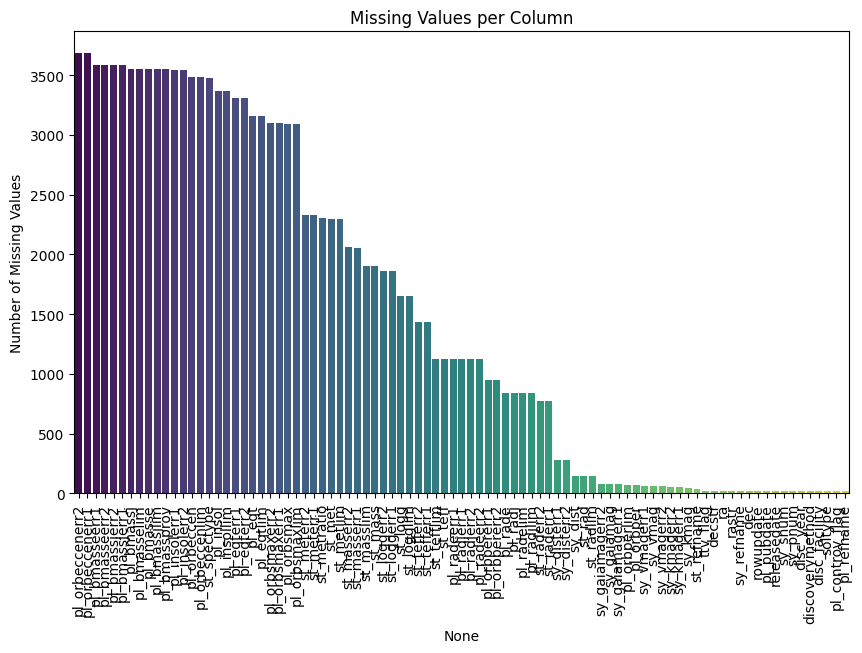

2025-10-03 23:24:02,830 -INFO - Missing value analysis completed and visualized.


In [8]:
missing_val_analysis=MissingValueAnalysisFactory().get_analyzer("report").analyze(k2_df)
missing_val_analysis_visualize=MissingValueAnalysisFactory().get_analyzer("visualize").analyze(k2_df)

In [9]:
k2_fill_nan=Impute().fill_na().handle(k2_df)

2025-10-03 23:24:02,851 -INFO - Imputing missing values with mean for numerical columns and mode for categorical columns
c:\Users\rk186\OneDrive\Desktop\NASA_challenge_2025\src\handelling_missing_values.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0],inplace=True)
c:\Users\rk186\OneDrive\Desktop\NASA_challenge_2025\src\handelling_missing_values.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The 

In [10]:
print("Null value is present:",True if k2_fill_nan.isna().sum().sum()>0 else False)

Null value is present: False


In [11]:
print(f"Duplicate rows present: {True if k2_fill_nan.duplicated().sum()>0 else False}")

Duplicate rows present: True


**Removing duplicate**

In [12]:
handeling_duplicates=Impute().handle_duplicates().handle(k2_fill_nan)

2025-10-03 23:24:03,234 -INFO - Removed 13 duplicate rows


## **Preprocessing Data**

In [13]:
preprocess=PreprocessingFactory().get_preprocessor("remove_columns",columns_to_remove=config["k2_data"]["remove_col"]).preprocess(handeling_duplicates)

2025-10-03 23:24:03,246 -INFO - Removing columns: ['pl_name', 'hostname', 'disp_refname', 'discoverymethod', 'default_flag', 'pl_controv_flag', 'pl_radelim', 'pl_orbperlim', 'st_tefflim', 'st_radlim', 'st_logg', 'st_logglim', 'sy_vmagerr1', 'sy_vmagerr2', 'pl_radjlim', 'pl_bmassprov', 'st_spectype', 'st_metratio', 'disc_year', 'disc_facility', 'pl_refname', 'st_refname', 'sy_refname', 'rastr', 'decstr', 'rowupdate', 'pl_pubdate', 'releasedate']
2025-10-03 23:24:03,251 -INFO - Columns removed successfully


In [14]:
process_target_encode=PreprocessingFactory().get_preprocessor("map_values",column_name=config["k2_data"]["target_col"],mapping_dict=config["k2_data"]["map_values"]).preprocess(preprocess)

2025-10-03 23:24:03,260 -INFO - Mapping values in column: disposition
2025-10-03 23:24:03,267 -INFO - Values mapped successfully


In [15]:
process_target_encode.head()

,disposition,sy_snum,sy_pnum,soltype,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_rade,pl_radeerr1,pl_radeerr2,pl_radj,pl_radjerr1,pl_radjerr2,ttv_flag,st_teff,st_tefferr1,st_tefferr2,st_rad,st_raderr1,st_raderr2,ra,dec,sy_dist,sy_disterr1,sy_disterr2,sy_vmag,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2
0,1,1.0,1.0,Published Confirmed,41.688644,0.003353,-0.003419,2.355454,0.310000,-0.166773,0.210139,0.027656,-0.014878,0.0,5703.00,50.00,-50.00,0.956122,0.098585,-0.054675,53.651123,20.599021,179.4610,1.2570,-1.2400,10.849,9.368,0.018,-0.018,10.8644,0.000249,-0.000249
1,1,1.0,1.0,Published Confirmed,41.685500,0.003000,-0.003100,2.230000,0.140000,-0.110000,0.198947,0.012490,-0.009814,0.0,5766.00,99.00,-99.00,0.928000,0.055000,-0.040000,53.651123,20.599021,179.4610,1.2570,-1.2400,10.849,9.368,0.018,-0.018,10.8644,0.000249,-0.000249
2,1,1.0,1.0,Published Confirmed,41.685500,0.003000,-0.003000,2.578070,0.112090,-0.112090,0.230000,0.010000,-0.010000,0.0,5766.00,99.00,-99.00,1.080000,0.060000,-0.060000,53.651123,20.599021,179.4610,1.2570,-1.2400,10.849,9.368,0.018,-0.018,10.8644,0.000249,-0.000249
3,2,1.0,0.0,Published Candidate,2.301830,0.000280,-0.000300,1.120000,0.110000,-0.080000,0.099900,0.009800,-0.007000,0.0,4616.52,82.36,-115.56,0.762602,0.053651,-0.037585,183.846245,-6.268329,97.1795,0.4642,-0.4598,11.727,9.220,0.019,-0.019,11.3995,0.001307,-0.001307
4,2,1.0,0.0,Published Candidate,2.302368,0.000105,-0.000103,1.312588,0.524177,-0.120814,0.120000,0.050000,-0.010000,0.0,4720.00,50.00,-50.00,0.710995,0.018609,-0.020398,183.846245,-6.268329,97.1795,0.4642,-0.4598,11.727,9.220,0.019,-0.019,11.3995,0.001307,-0.001307


In [16]:
process_cat_labels=PreprocessingFactory().get_preprocessor("label_encoding").preprocess(process_target_encode)

2025-10-03 23:24:03,332 -INFO - Applying Label Encoding to categorical columns
2025-10-03 23:24:03,334 -INFO - Label Encoding applied successfully


In [17]:
process_cat_labels.sample(5)

,disposition,sy_snum,sy_pnum,soltype,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_rade,pl_radeerr1,pl_radeerr2,pl_radj,pl_radjerr1,pl_radjerr2,ttv_flag,st_teff,st_tefferr1,st_tefferr2,st_rad,st_raderr1,st_raderr2,ra,dec,sy_dist,sy_disterr1,sy_disterr2,sy_vmag,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2
2129,1,1.0,1.0,1,0.369310,0.000010,-0.000010,1.700000,0.090000,-0.050000,0.151664,0.008029,-0.004461,0.0,5245.0,46.000000,-52.000000,0.75000,0.010000,-0.010000,182.751404,-9.765239,152.509,1.079,-1.063,12.129,10.051,0.026,-0.026,11.8999,0.000602,-0.000602
2196,1,1.0,1.0,1,6.569188,0.000031,-0.000031,13.562867,1.008808,-1.008808,1.210000,0.090000,-0.090000,0.0,5585.0,120.000000,-120.000000,1.06000,0.070000,-0.060000,188.137317,-9.607612,347.917,8.287,-7.917,12.727,10.995,0.021,-0.021,12.4814,0.000166,-0.000166
1229,2,1.0,0.0,0,8.853000,14.733158,-9.498644,8.557868,2.954902,-2.873445,0.763874,0.264670,-0.256166,0.0,5639.0,123.000000,-123.000000,1.12685,0.120442,-0.124184,205.901248,-11.223622,701.022,19.694,-18.665,14.202,12.319,0.029,-0.029,13.9429,0.000755,-0.000755
1638,2,1.0,0.0,0,7.084267,0.000222,-0.000222,3.848000,0.332000,-0.273000,0.343296,0.029619,-0.024355,0.0,4572.0,138.000000,-138.000000,0.76500,0.056000,-0.052000,346.042421,-7.982515,309.923,2.625,-2.582,14.185,11.635,0.021,-0.021,13.9147,0.000432,-0.000432
277,2,1.0,0.0,0,0.841126,14.733158,-9.498644,0.884000,2.954902,-2.873445,0.078865,0.264670,-0.256166,0.0,4289.0,111.074503,-110.499384,0.66000,0.120442,-0.124184,244.162935,-25.870070,676.494,13.684,-13.161,13.855,10.645,0.019,-0.019,13.2366,0.000186,-0.000186


In [18]:
process_cat_labels.soltype.value_counts()

soltype
0    2391
1    1357
2     145
Name: count, dtype: int64

In [19]:
process_cat_labels.columns

Index(['disposition', 'sy_snum', 'sy_pnum', 'soltype', 'pl_orbper',
       'pl_orbpererr1', 'pl_orbpererr2', 'pl_rade', 'pl_radeerr1',
       'pl_radeerr2', 'pl_radj', 'pl_radjerr1', 'pl_radjerr2', 'ttv_flag',
       'st_teff', 'st_tefferr1', 'st_tefferr2', 'st_rad', 'st_raderr1',
       'st_raderr2', 'ra', 'dec', 'sy_dist', 'sy_disterr1', 'sy_disterr2',
       'sy_vmag', 'sy_kmag', 'sy_kmagerr1', 'sy_kmagerr2', 'sy_gaiamag',
       'sy_gaiamagerr1', 'sy_gaiamagerr2'],
      dtype='object')

## **Splitting data**

In [20]:
x_train,x_test,y_train,y_test=DataSpliter(SimpleTrainTestSplit(test_size=config["data_splitter"]["test_size"],random_state=config["data_splitter"]["random_state"])).split(process_cat_labels,config["k2_data"]["target_col"])

2025-10-03 23:24:03,430 -INFO - Splitting data..
2025-10-03 23:24:03,430 -INFO - Performing simple Train-Test-Split.
2025-10-03 23:24:03,445 -INFO - Train-Test-Split completed.


In [21]:
print(f"Shape of x_train: {x_train.shape}, y_train: {y_train.shape}")
print(f"Shape of x_test: {x_test.shape}, y_test: {y_test.shape}")

Shape of x_train: (3114, 31), y_train: (3114,)
Shape of x_test: (779, 31), y_test: (779,)


In [22]:
model=ModelFactory().get_model("random_forest_k2").build_model(x_train,y_train)


2025-10-03 23:24:03,467 -INFO - Building Random Forest Classifier model
2025/10/03 23:24:05 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\rk186\OneDrive\Desktop\NASA_challenge_2025\nasa_challenge\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001111 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6379
[LightGBM] [Info] Number of data points in the train set: 3114, number of used features: 31
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


c:\Users\rk186\OneDrive\Desktop\NASA_challenge_2025\nasa_challenge\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
2025/10/03 23:24:08 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\rk186\OneDrive\Desktop\NASA_challenge_2025\nasa_challenge\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Miss

In [23]:
ModelEvaluationFactory().get_evaluator("accuracy").evaluate(model,"test",x_test,y_test)


2025-10-03 23:24:19,641 -INFO - Evaluating model using accuracy score
c:\Users\rk186\OneDrive\Desktop\NASA_challenge_2025\nasa_challenge\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
2025/10/03 23:24:19 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\rk186\OneDrive\Desktop\NASA_challenge_2025\nasa_challenge\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever t

{'accuracy': 0.9525032092426188,
 'precision_macro': 0.9114880892631668,
 'recall_macro': 0.8829562924557669,
 'f1_macro': 0.8957138890113363,
 'precision_weighted': 0.9509060246179866,
 'recall_weighted': 0.9525032092426188,
 'f1_weighted': 0.9512486197372905}

In [24]:
ModelEvaluationFactory().get_evaluator("accuracy").evaluate(model,"train",x_train,y_train)

2025-10-03 23:24:20,175 -INFO - Evaluating model using accuracy score
c:\Users\rk186\OneDrive\Desktop\NASA_challenge_2025\nasa_challenge\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
2025/10/03 23:24:20 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\rk186\OneDrive\Desktop\NASA_challenge_2025\nasa_challenge\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever t

{'accuracy': 1.0,
 'precision_macro': 1.0,
 'recall_macro': 1.0,
 'f1_macro': 1.0,
 'precision_weighted': 1.0,
 'recall_weighted': 1.0,
 'f1_weighted': 1.0}

c:\Users\rk186\OneDrive\Desktop\NASA_challenge_2025\nasa_challenge\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
2025/10/03 23:24:20 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\rk186\OneDrive\Desktop\NASA_challenge_2025\nasa_challenge\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Miss

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.70      0.76        71
           1       0.99      1.00      0.99       425
           2       0.92      0.95      0.94       283

    accuracy                           0.95       779
   macro avg       0.91      0.88      0.90       779
weighted avg       0.95      0.95      0.95       779



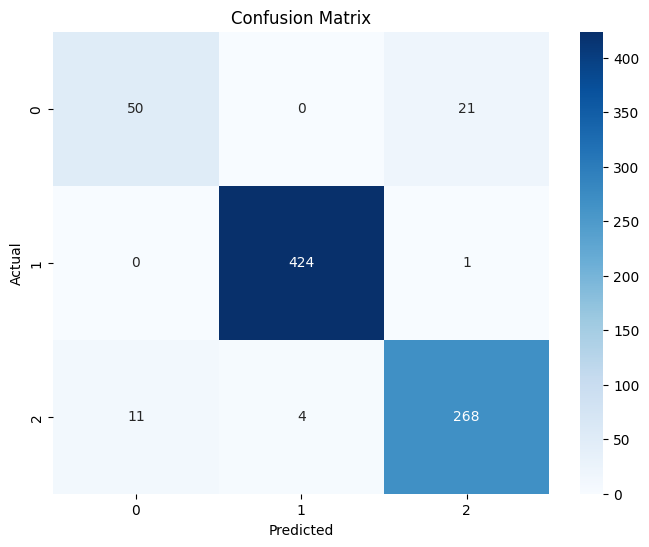

2025-10-03 23:24:21,003 -INFO - Confusion matrix plotted successfully.


In [25]:
ConfusionAndReportVisualizer().get_classification_report_visualizer().plot(y_test,model.predict(x_test))
ConfusionAndReportVisualizer().get_confusion_matrix_visualizer().plot(y_test,model.predict(x_test),[0,1,2])
